# Лабораторная работа №2. Дискретные LTI системы.


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 | 8 | 7 | 8 | 7 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

In [37]:
M = 7

In [38]:
x = np.ones(M)
h = np.ones(M)

In [39]:
y = signal.convolve(x, h)
len(y)

13

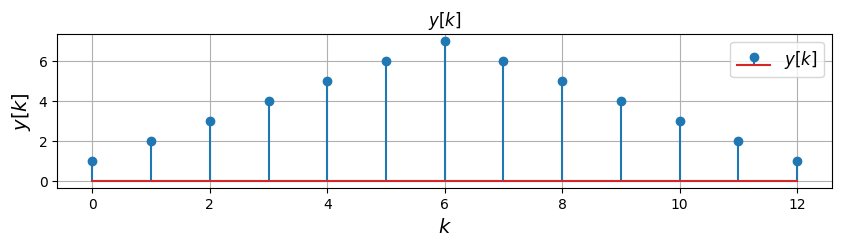

In [40]:
k = np.linspace(0, len(y), 1)
plt.figure(figsize=(10, 2))
plt.stem(y, label=r'$y[k]$')
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$y[k]$', fontsize=14)
plt.title('$y[k]$')
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

## Задача 1.2. Эффективное вычисление свертки




| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |    $7$ |    $8$ |    $9$ |    $10$ |  
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ | $230$ | $325$ | $501$ | $1000$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод.

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени.



In [41]:
N = 2 ** 18
n0 = 325

In [42]:
k = np.arange(N)
x = np.cos(2 * np.pi * k * n0 / N)
h = np.sin(2 * np.pi * k * n0 / N)

In [43]:
start = time.time()
y = signal.convolve(x, h, method='direct')
end = time.time()
print(f'For direct method time = {end-start}')
start = time.time()
y_fft = signal.convolve(x, h, method='fft')
end = time.time()
print(f'For fft method time = {end-start}')

For direct method time = 25.086350202560425
For fft method time = 0.01173710823059082


In [44]:
k = np.linspace(0, len(y), 1)

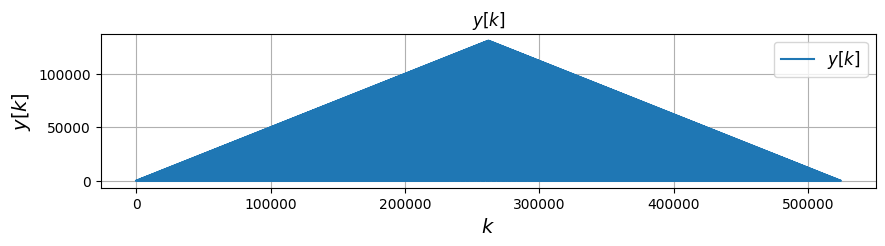

In [45]:
plt.figure(figsize=(10, 2))
plt.plot(np.abs(y), label=r'$y[k]$')
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$y[k]$', fontsize=14)
plt.title('$y[k]$')
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

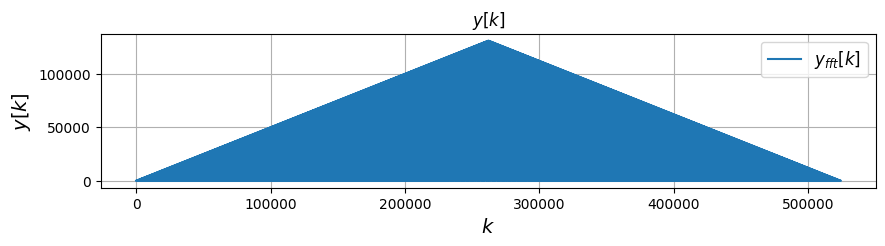

In [46]:
plt.figure(figsize=(10, 2))
plt.plot(np.abs(y_fft), label=r'$y_{fft}[k]$')
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$y[k]$', fontsize=14)
plt.title('$y[k]$')
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 | 14 | 13 |  9 | 12 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 | 50 | 40 | 24 | 50 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 | 63 | 57 | 35 | 63 |
| $N$ |100 |140 |130 |100 |140 | 115 |140 | 130 | 100 | 140 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы):

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

In [47]:
M1 = 13
M2 = 40
K = 57
N = 130
mu = 0
sigma = 0.1

Импульсная характеристика $h[k]$ фильтра это его отклик на единичный импульс $\mathbf{1} [k - m]$:
$$
  h[k] = \frac{1}{M}\sum_{m=0}^{M-1} \mathbf{1} [k-m] \Rightarrow
   h[k] = \begin{cases}
  \frac{1}{M}, \text{$k = 0, .. , M - 1$} \\
  0, \text{в ост. случаях}
  \end{cases}
$$

In [48]:
k = np.arange(N)
x_noise = np.sin(2 * np.pi * k / K) + np.random.normal(mu, sigma, N)
x = np.sin(2 * np.pi * k / K)

In [49]:
hM1 = 1/M1 * np.ones(M1)
hM2 = 1/M2 * np.ones(M2)

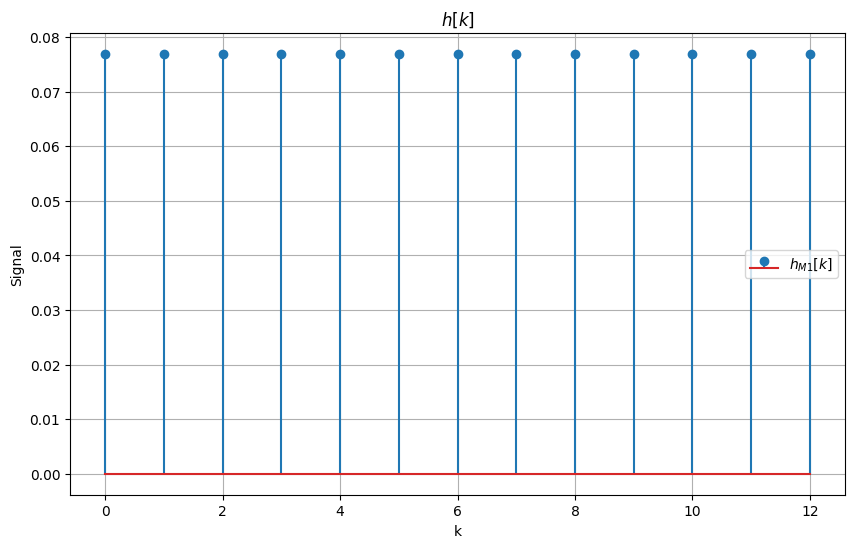

In [50]:
plt.figure(figsize=(10, 6))
plt.stem(hM1, label='$h_{M1}[k]$')
plt.title('$h[k]$')
plt.xlabel('k')
plt.ylabel('Signal')
plt.grid(); plt.legend(); plt.show()

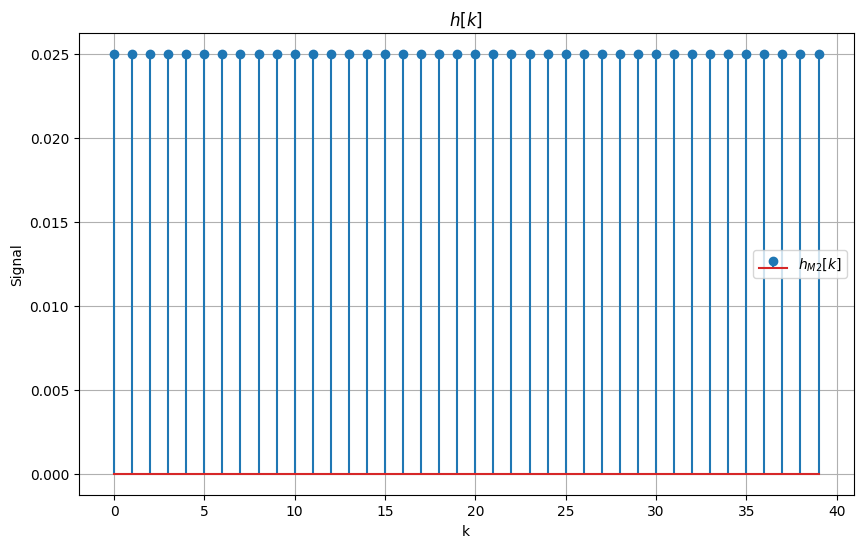

In [51]:
plt.figure(figsize=(10, 6))
plt.stem(hM2, label='$h_{M2}[k]$')
plt.title('$h[k]$')
plt.xlabel('k')
plt.ylabel('Signal')
plt.grid(); plt.legend(); plt.show()

In [52]:
yM1 = signal.convolve(x_noise, hM1)
yM2 = signal.convolve(x_noise, hM2)

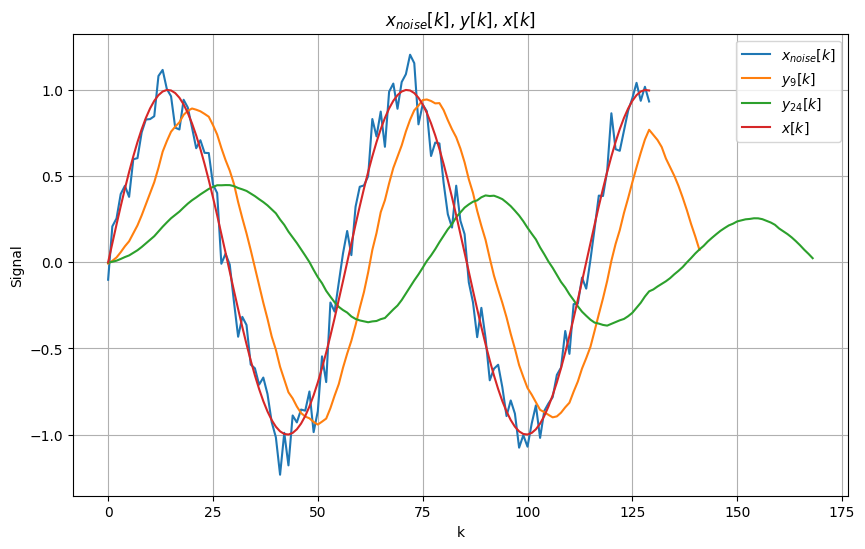

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(x_noise, label='$x_{noise}[k]$')
plt.plot(yM1, label='$y_{9}[k]$')
plt.plot(yM2, label='$y_{24}[k]$')
plt.plot(x, label='$x[k]$')
plt.title('$x_{noise}[k]$, $y[k]$, $x[k]$')
plt.xlabel('k')
plt.ylabel('Signal')
plt.grid(); plt.legend(); plt.show()

In [54]:
nu = np.linspace(-0.5, 0.5, 1024)
HM1 = np.fft.fftshift(np.fft.fft(hM1, 1024))
HM2 = np.fft.fftshift(np.fft.fft(hM2, 1024))

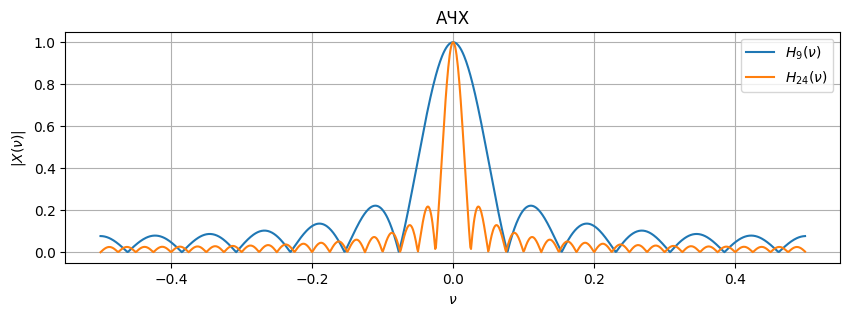

In [55]:
plt.figure(figsize=(10,3))
plt.title('АЧХ')
plt.plot(nu, np.abs(HM1), label='$H_{9}(\\nu)$')
plt.plot(nu, np.abs(HM2), label='$H_{24}(\\nu)$')
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.legend()
plt.show()

## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями.

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

In [73]:
a = 1
b = 0.8
c = 0.5
M = 50
N = 180

In [74]:
h1 = np.zeros(2 * M + 1)
h1[0] = a / (a + b + c)
h1[M] = b / (a + b + c)
h1[2 * M] = c / (a + b + c)

h2 = np.zeros(2 * M + 1)
h2[0] = 1/2
h2[1] = 1/2

k = np.arange(N)
x = np.sin(6 * np.pi * k / N)
y_12 = signal.convolve(h2, signal.convolve(h1, x))
y_21 = signal.convolve(h1, signal.convolve(h2, x))

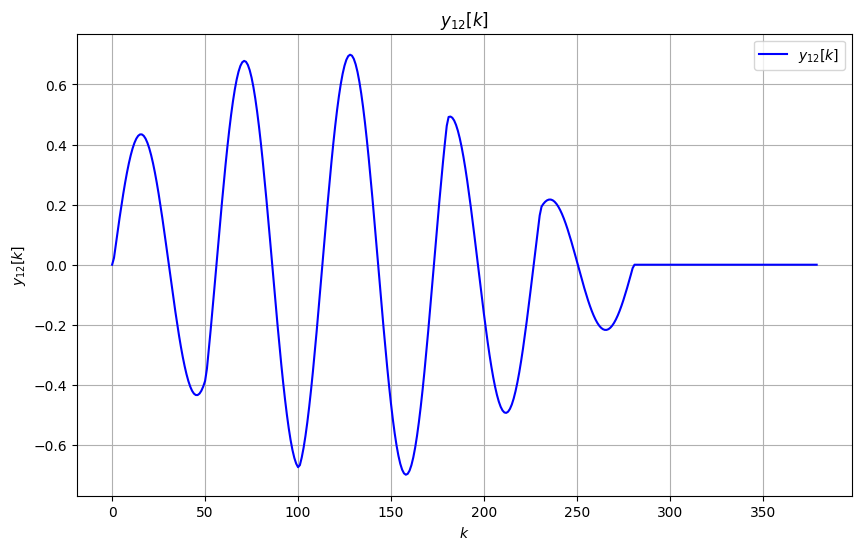

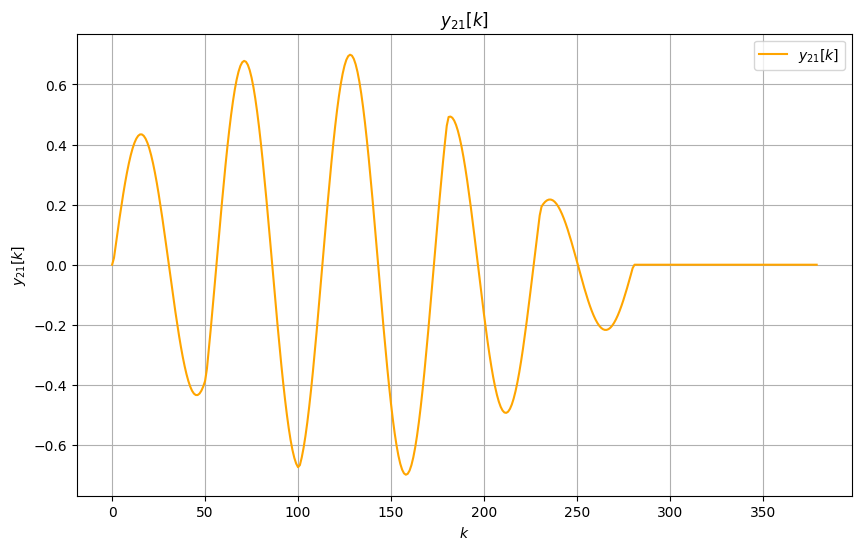

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(y_12, label='$y_{12}[k]$', color='blue')
plt.title('$y_{12}[k]$')
plt.xlabel('$k$')
plt.ylabel('$y_{12}[k]$')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_21, label='$y_{21}[k]$', color='orange')
plt.title('$y_{21}[k]$')
plt.xlabel('$k$')
plt.ylabel('$y_{21}[k]$')
plt.grid()
plt.legend()
plt.show()

# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |0.2 |0.3 |0.1 | 0.2 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 | 24 | 22 | 26 | 28 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта.

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

In [59]:
nuc = 0.3
N = 22

In [60]:
def get_h(n=N):
  k = np.arange(2 * n)
  k[n] = 2 * n
  h = np.sin(2 * np.pi * nuc * (k - n)) / (np.pi * (k - n))
  h[n] = 2 * nuc
  return h

In [61]:
hN = get_h(N)
nu = np.linspace(-0.5, 0.5, 1024)
HN = np.fft.fftshift(np.fft.fft(hN, 1024))

In [62]:
h2N = get_h(2*N)
nu = np.linspace(-0.5, 0.5, 1024)
H2N = np.fft.fftshift(np.fft.fft(h2N, 1024))

In [63]:
h4N = get_h(4*N)
nu = np.linspace(-0.5, 0.5, 1024)
H4N = np.fft.fftshift(np.fft.fft(h4N, 1024))

In [64]:
h16N = get_h(16 * N)
nu = np.linspace(-0.5, 0.5, 1024)
H16N = np.fft.fftshift(np.fft.fft(h16N, 1024))

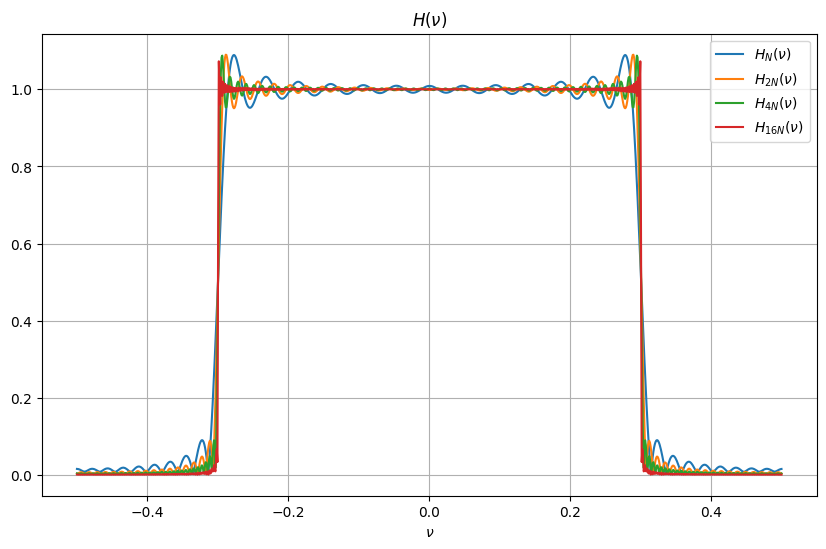

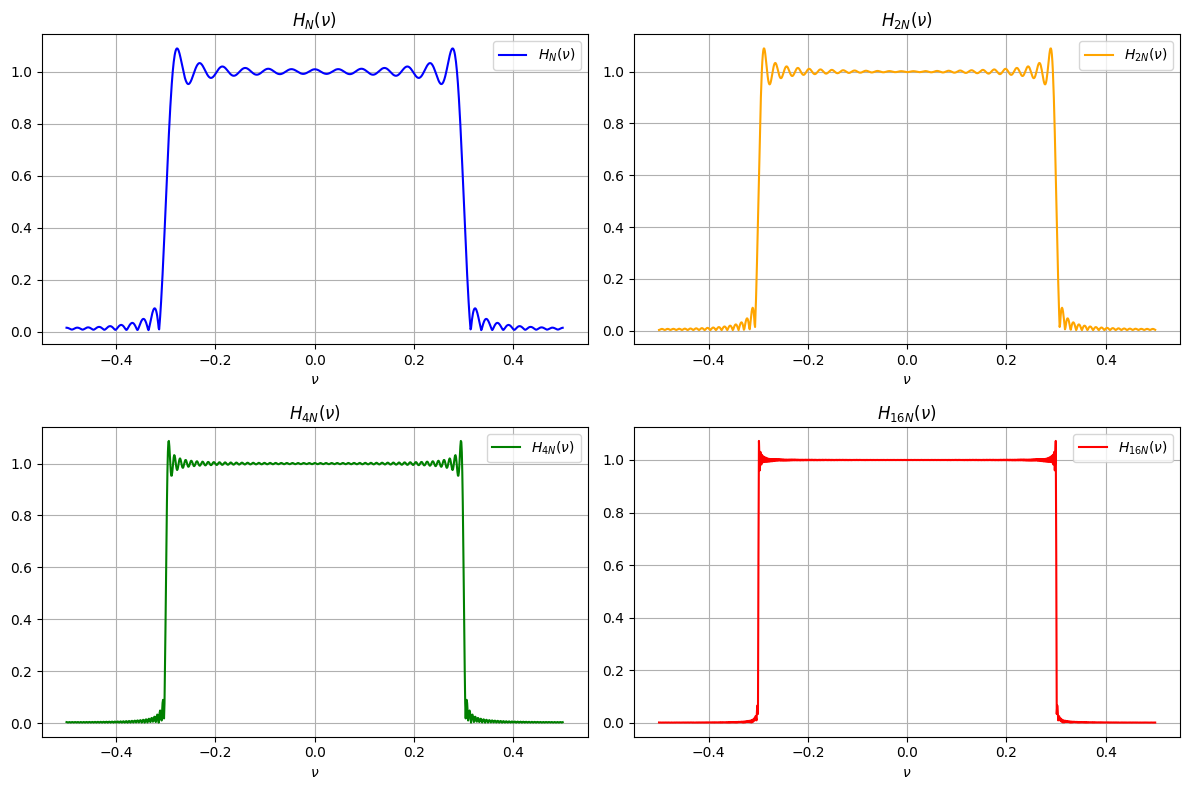

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(nu, np.abs(HN), label='$H_{N}(\\nu)$')
plt.plot(nu, np.abs(H2N), label='$H_{2N}(\\nu)$')
plt.plot(nu, np.abs(H4N), label='$H_{4N}(\\nu)$')
plt.plot(nu, np.abs(H16N), label='$H_{16N}(\\nu)$')
plt.title('$H(\\nu)$')
plt.xlabel('$\\nu$')
plt.grid(); plt.legend(); plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(nu, np.abs(HN), label='$H_{N}(\\nu)$', color='blue')
axes[0, 0].set_title('$H_{N}(\\nu)$')
axes[0, 0].set_xlabel('$\\nu$')
axes[0, 0].grid()
axes[0, 0].legend()

axes[0, 1].plot(nu, np.abs(H2N), label='$H_{2N}(\\nu)$', color='orange')
axes[0, 1].set_title('$H_{2N}(\\nu)$')
axes[0, 1].set_xlabel('$\\nu$')
axes[0, 1].grid()
axes[0, 1].legend()

axes[1, 0].plot(nu, np.abs(H4N), label='$H_{4N}(\\nu)$', color='green')
axes[1, 0].set_title('$H_{4N}(\\nu)$')
axes[1, 0].set_xlabel('$\\nu$')
axes[1, 0].grid()
axes[1, 0].legend()

axes[1, 1].plot(nu, np.abs(H16N), label='$H_{16N}(\\nu)$', color='red')
axes[1, 1].set_title('$H_{16N}(\\nu)$')
axes[1, 1].set_xlabel('$\\nu$')
axes[1, 1].grid()
axes[1, 1].legend()

fig.tight_layout()
plt.show()

Эффект Гиббса: колебания вблизи точек разрыва не исчезают даже при больших N

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке.

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15, 0.2, 0.15, 0.15, 0.1]
    amp1 = [1,  0, 0.2, 1, 1, 0.6, 0.3, 0.2, 1, 1]
    nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4, 0.4,  0.3,  0.35,  0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7,  1, 1, 1, 0.4, 0.7]
    def H_val(nu, n):
        return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()
    return np.array([H_val(x, variant-1) for x in nu])

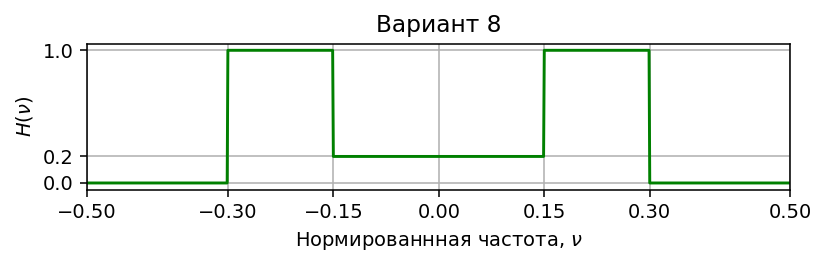

In [68]:
H = task_3_2(variant=8)
h_ideal = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H)))

In [70]:
N = 50
new_h = h_ideal[int(len(h_ideal)/2) - N:int(len(h_ideal)/2) + N]

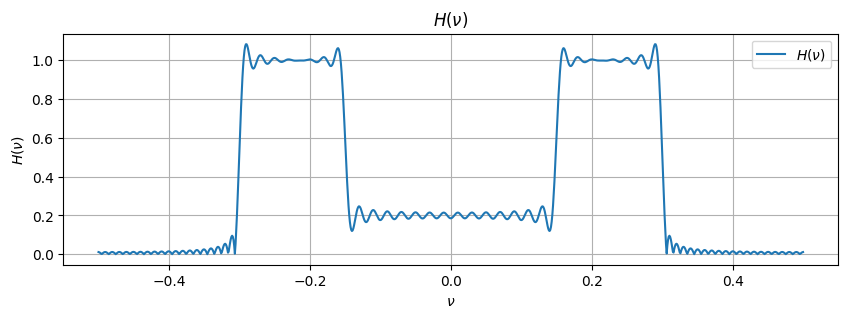

In [72]:
plt.figure(figsize=(10, 3))
nu = np.linspace(-0.5, 0.5, 1024)
plt.plot(nu, np.abs(np.fft.fftshift(np.fft.fft(new_h, 1024))), label='$H(\\nu)$')
plt.title('$H(\\nu)$')
plt.xlabel('$\\nu$')
plt.ylabel('$H(\\nu)$')
plt.grid(); plt.legend(); plt.show()